In [34]:
#读取spam.csv文件
import pandas as pd
df = pd.read_csv("/Users/赵政/Desktop/Machine-Learning-master/4. Naive Bayes/data_spam/spam.csv", encoding = 'latin')
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [35]:
# 重命名数据中的v1和v2列，使得拥有更好的可读性
df.rename(columns = {'v1':'label', 'v2':'text'},inplace = True)
df.head()

label                                               text Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [36]:
# 把'ham'和'spam'标签重新命名为数字0和1
df['relabel'] = df['label'].map({'ham':0, 'spam':1})
df.head()

label                                               text Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  relabel  
0        NaN        NaN        0  
1        NaN        NaN        0  
2        NaN        NaN        1  
3        NaN        NaN        0  
4        NaN        NaN        0

In [37]:
# 统计有多少个ham，有多少个spam
print("# of ham:",len(df[df.relabel==0]),"# of spam: ",len(df[df.relabel ==1]))
print("# of total samples",len(df))

# of ham: 4825 # of spam:  747
# of total samples 5572


the minimize length is: 2


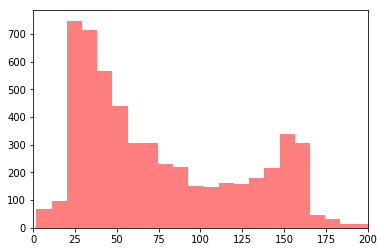

In [38]:
#统计文本的长度信息
text_lengths = [len(df.loc[i,'text'])for i in range(len(df))]
print("the minimize length is:", min(text_lengths))
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(text_lengths,100, facecolor = 'red', alpha = 0.5)
plt.xlim(0,200)
plt.show()

In [39]:
# 导入英文昵称停用词库
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
# what is stop wordS? he she the an a that this ...
stopset = set(stopwords.words("english"))
# 构建文本的向量（基于词频的表示）
vectorizer = CountVectorizer(stop_words = stopset, binary = True)
#vectorizer = CountVectorizer()
# sparse matrix -表示成稀疏矩阵的形式
x = vectorizer.fit_transform(df.text)
y = df.relabel
print(x)

  (0, 8150)	1
  (0, 1061)	1
  (0, 3554)	1
  (0, 2023)	1
  (0, 1727)	1
  (0, 4412)	1
  (0, 8358)	1
  (0, 3594)	1
  (0, 1729)	1
  (0, 1288)	1
  (0, 2301)	1
  (0, 5833)	1
  (0, 4287)	1
  (0, 3510)	1
  (1, 5454)	1
  (1, 8264)	1
  (1, 4255)	1
  (1, 4448)	1
  (1, 5427)	1
  (2, 77)	1
  (2, 1145)	1
  (2, 6155)	1
  (2, 7823)	1
  (2, 7136)	1
  (2, 6103)	1
  :	:
  (5567, 6155)	1
  (5568, 2945)	1
  (5568, 3307)	1
  (5568, 8522)	1
  (5568, 3523)	1
  (5568, 3847)	1
  (5569, 7277)	1
  (5569, 5764)	1
  (5569, 5063)	1
  (5570, 1525)	1
  (5570, 901)	1
  (5570, 4104)	1
  (5570, 3647)	1
  (5570, 1763)	1
  (5570, 3430)	1
  (5570, 2856)	1
  (5570, 6955)	1
  (5570, 7952)	1
  (5570, 5263)	1
  (5570, 4551)	1
  (5570, 8195)	1
  (5570, 3320)	1
  (5571, 6417)	1
  (5571, 7775)	1
  (5571, 5173)	1


[nltk_data] Downloading package stopwords to /Users/赵政/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# 把数据分成训练数据和预测数据
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 100) 
print ("训练数据中的样本个数: ", x_train.shape[0], "测试数据中的样本个数: ", x_test.shape[0])

训练数据中的样本个数:  4457 测试数据中的样本个数:  1115


In [43]:
#利用朴素贝叶斯做训练
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB(alpha = 1.0,fit_prior = True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("accuracy on test data: ", accuracy_score(y_pred,y_test))

accuracy on test data:  0.9757847533632287


In [45]:
#打印混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred,labels = [0,1])

array([[952,  18],
       [  9, 136]])